10
Score: 0.03616365848684844
Runtime: 12671ms


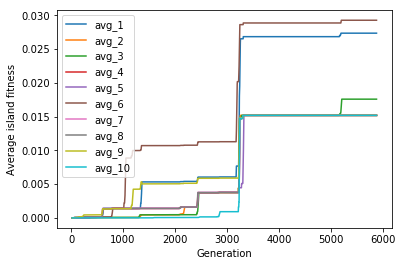

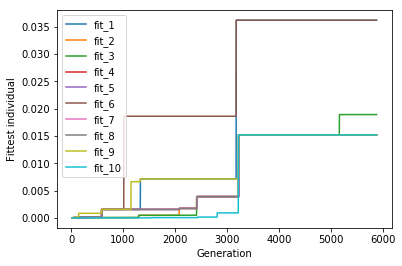

'\n# so div_1 is the diversity on island 1\n# blue shows how many individuals originate from island 1, orange from 2\nfor i in range(num_isl):\n    df_div = pd.DataFrame.from_dict(dict(df[\'div_\'+str(i+1)]), orient=\'index\')\n    df_div.plot(kind="bar", stacked=True, color=swap_color(colors,i), width=1.0)\n    plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,\n       ncol=num_isl, mode="expand", borderaxespad=0.)\n    plt.xticks([])\n    plt.xlabel(\'Migration rounds\')\n    plt.ylabel(\'Population size\')\n\nplt.show()\n'

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

evals = []

def getVal(entry): 
    return entry.split(": ")[1]

def diversity(values, num_isl):
    values = values[1:-1].replace(" ", "") # remove {}
    values = values.split(',')
    value_dict = {int(value.split('=')[0]): int(value.split('=')[1]) for value in values}
    
    for i in range(num_isl):
        if((i+1) not in value_dict.keys()):
            value_dict[(i+1)] = 0
    
    # print (value_dict)
    return value_dict

# global params pop_size, 
config_params = 6
num_isl = 0
with open('output_kat.txt') as f:
    content = f.readlines()
    content = [x.strip() for x in content];
    num_isl = int(content[0].split(": ")[1])
    print (num_isl)
    print (content[-2])
    print (content[-1])    
    for index, value in enumerate(content):
        if ("EVAL:" in value):
            dict_islands = {}
            dict_islands['eval'] = int(value.split(": ")[1])
            offset=0
            for i in range(num_isl):
                dict_islands['div_'+str(i+1)] = diversity(getVal(content[index+1+i]),num_isl)

            for i in range(num_isl):
                dict_islands['avg_'+str(i+1)] = float(getVal(content[index+num_isl+1+offset]))
                dict_islands['fit_'+str(i+1)] = float(getVal(content[index+num_isl+2+offset]))
                # we do 2 measurements per island
                offset+=2
            evals.append(dict_islands)
            
df = pd.DataFrame(evals)
df.plot(x='eval', y=['avg_'+str(i+1) for i in range(num_isl)])
plt.xlabel('Generation')
plt.ylabel('Average island fitness')
df.plot(x='eval', y=['fit_'+str(i+1) for i in range(num_isl)])
plt.xlabel('Generation')
plt.ylabel('Fittest individual')
plt.show()
plt.figure(figsize=(20,10))




# color mapping for plots below
colors = {0:'c', 1:'r',2:'g',3:'y',4:'m', 5:'c', 6: 'b', 7:'k', 8:'#F0F0F0', 9:'#888888'}
def swap_color(dct, index):
    lst = []
    for i in dct.keys():
        if (i == index):
            lst.insert(0, colors[i])
        else:
            lst.append(colors[i])
            
    return lst 

'''
# so div_1 is the diversity on island 1
# blue shows how many individuals originate from island 1, orange from 2
for i in range(num_isl):
    df_div = pd.DataFrame.from_dict(dict(df['div_'+str(i+1)]), orient='index')
    df_div.plot(kind="bar", stacked=True, color=swap_color(colors,i), width=1.0)
    plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
       ncol=num_isl, mode="expand", borderaxespad=0.)
    plt.xticks([])
    plt.xlabel('Migration rounds')
    plt.ylabel('Population size')

plt.show()
'''


//anaconda/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:29: DeprecationWarning: 'U' mode is deprecated


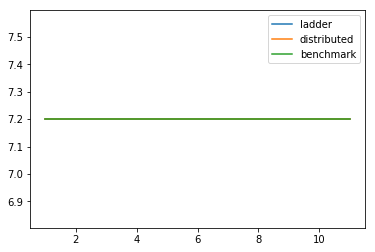

[7.2, 7.2, 7.2, 7.2, 7.2, 7.2]


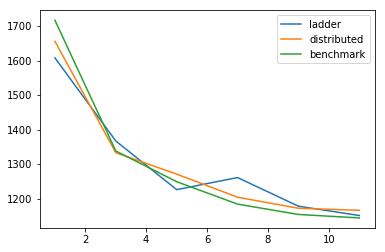

In [23]:
import os
path = './txt/'
import re

benchmark_score = 0
ladder_score = 0

benchmark_run = 0
ladder_run = 0

# these are performance scores ladder / baseline
# GRID SEARCH MIG POP => average fitness becomes 
# THE < MIG POP THE > IMPORTANCE OF MIGRATION

prefix = 'x_'

# runtime, performance
mig_pop_dict = {}

counter = 0 # for averaging
for filename in os.listdir(path):
    
    if (filename.split('_')[1] == 'Store'):
        continue
    
    mig_pop = int(filename.split('_')[1])
    
    if filename.startswith(prefix):
        with open(path+filename, 'rU') as f:
            t = f.read()
            score = re.search('([0-9].?[0-9]*)', t) 
            runtime = re.search('([0-9]?.?[0-9]*)ms', t)
            runtime = float(runtime.group(0)[:-2])      
            score = float(score.group(0))
            
            if (mig_pop not in mig_pop_dict.keys()):
                mig_pop_dict[mig_pop] = {'b_perf': 0, 'b_run':0, 'l_perf': 0, 'l_run': 0, 'd_perf':0, 'd_run':0}
            
            if ('benchmark' in filename):
                mig_pop_dict[mig_pop]['b_perf'] = float(mig_pop_dict[mig_pop]['b_perf']) + score
                mig_pop_dict[mig_pop]['b_run'] = float(mig_pop_dict[mig_pop]['b_run']) + runtime
            elif('ladder' in filename):
                mig_pop_dict[mig_pop]['l_perf'] = float(mig_pop_dict[mig_pop]['l_perf']) + score
                mig_pop_dict[mig_pop]['l_run'] = float(mig_pop_dict[mig_pop]['l_run']) + runtime
            elif('distr' in filename):
                mig_pop_dict[mig_pop]['d_perf'] = float(mig_pop_dict[mig_pop]['d_perf']) + score
                mig_pop_dict[mig_pop]['d_run'] = float(mig_pop_dict[mig_pop]['d_run']) + runtime
    
keys = list(mig_pop_dict.keys())
keys = [int(x) for x in keys]
keys = sorted(keys, reverse=False)

l_perfs = [mig_pop_dict[key]['l_perf']/10 for key in keys]
b_perfs = [mig_pop_dict[key]['b_perf']/10 for key in keys]
d_perfs = [mig_pop_dict[key]['d_perf']/10 for key in keys]

l_runs = [mig_pop_dict[key]['l_run'] for key in keys]
b_runs = [mig_pop_dict[key]['b_run'] for key in keys]
d_runs = [mig_pop_dict[key]['d_run'] for key in keys]

plt.plot(keys, l_perfs, label='ladder')
plt.plot(keys, d_perfs, label='distributed')
plt.plot(keys, b_perfs, label='benchmark')
plt.legend()
plt.show()

print (d_perfs)

plt.plot(keys, l_runs, label='ladder')
plt.plot(keys, d_runs, label='distributed')
plt.plot(keys, b_runs, label='benchmark')
plt.legend()
plt.show()

